# Regressor

In [4]:
import kaleido
import pandas as pd
import numpy as np
import plotly.graph_objects as go
######## Search space #########
import sys
sys.path.append("../")
from search_space.RegNet import RegNet
from search_space.utils import create_widths_plot, scatter_results
# Initialize an empty list to store dictionaries
def results_to_df(path, name):
    data = []
    # Open the text file
    with open(path, 'r') as file:
        lines = file.readlines()
        # Initialize an empty dictionary to store data for each block
        block_data = {}
        for line in lines:
            # If the line contains dashes, it indicates the end of a block
            if '-------------------------' in line:
                # If block_data is not empty, add it to the list of data dictionaries
                if block_data:
                    data.append(block_data)
                    # Reset block_data for the next block
                    block_data = {}
            elif 'best_acc' in line:
                continue
            else:
                # Split the line by ':'
                #print(line)
                key, value = line.strip().split(': ')
                # Store the key-value pair in the block_data dictionary
                block_data[key] = value

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)

    # Convert columns to appropriate data types if needed
    df['epoch'] = df['epoch'].astype(int)
    df['lr'] = df['lr'].astype(float)
    df['train_acc'] = df['train_acc'].astype(float)
    df['train_loss'] = df['train_loss'].astype(float)
    df['test_acc'] = df['test_acc'].astype(float)
    df['test_acc_top5'] = df['test_acc_top5'].astype(float)
    df['test_loss'] = df['test_loss'].astype(float)
    df['epoch_time'] = df['epoch_time'].astype(float)
    df=df.assign(name=name)
    
    return df

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import json


def get_predictor_data(tests_folder,studies):
    train_data=[]
    for study_name in studies: 
        #study_name="tests_LaMelo_13_06_2024_02_11"
        file_path=f"{tests_folder}/{study_name}/{study_name}.evonas"
        with open(file_path, 'r') as file:
            results = json.load(file)

        individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
        data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]
        data_models["num_classes"]=results["metadata"]["num_classes"]
        data_models["num_channels"]=results["metadata"]["input_shape"][1]
        data_models["benchmark"]=results["metadata"]["benchmark"]
        print(study_name)
        print(results["metadata"])

        data=[]
        for index, row in individuals_df.iterrows():
            name=row["name"]
            generation=row["generation"]
            try:
                test_acc=results_to_df(f"{tests_folder}/{study_name}/Generation_{generation}/{name}/worklog.txt", f"{name}")[["epoch","test_acc","name"]]
                test_acc_piv = test_acc.pivot(index='name', columns='epoch', values='test_acc').add_prefix("epoch_").reset_index()
                test_acc_piv["gen"]=generation
                data.append(pd.merge(test_acc_piv, data_models, on="name"))
            except:
                pass
        data=pd.concat(data)
        train_data.append(data)
    train_data=pd.concat(train_data)
    return train_data

In [3]:
corr_scores={}
accuracies={}
test_dataset="Adaline"
tests_folder="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/full_training_random_20epochs_2gen_aug"
studies_train=[ 
               "tests_Caitie_18_06_2024_06_22",
               "tests_Gutenberg_17_06_2024_10_26", 
               "tests_LaMelo_17_06_2024_19_54",
               "tests_Mateo_17_06_2024_21_50",
               "tests_Sadie_18_06_2024_01_41",
               "tests_Chester_18_06_2024_00_21"

              ]
studies_test=["tests_Adaline_17_06_2024_17_44"]

train_data=get_predictor_data(tests_folder,studies_train)
test_data=get_predictor_data(tests_folder,studies_test)

#train_data2=get_predictor_data(tests_folder2,studies_train2)

/tmp/ipykernel_2984881/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_2984881/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Caitie_18_06_2024_06_22
{'num_classes': 4, 'input_shape': [49260, 3, 64, 64], 'codename': 'Caitie', 'benchmark': 47.008, 'time_remaining': -38886.48230648041, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_2984881/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_2984881/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Gutenberg_17_06_2024_10_26
{'input_shape': [45000, 1, 27, 18], 'codename': 'Gutenberg', 'benchmark': 40.98, 'num_classes': 6, 'time_remaining': 6656.930239677429, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_2984881/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_2984881/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_LaMelo_17_06_2024_19_54
{'num_classes': 10, 'codename': 'LaMelo', 'input_shape': [50000, 1, 24, 24], 'benchmark': 85.2, 'time_remaining': -1196.3611073493958, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_2984881/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_2984881/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Mateo_17_06_2024_21_50
{'num_classes': 10, 'input_shape': [50000, 3, 28, 28], 'codename': 'Mateo', 'benchmark': 90.87, 'time_remaining': -8204.630620241165, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_2984881/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_2984881/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Sadie_18_06_2024_01_41
{'input_shape': [50000, 3, 64, 64], 'codename': 'Sadie', 'benchmark': 80.33, 'num_classes': 10, 'time_remaining': -22070.273110866547, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_2984881/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_2984881/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Chester_18_06_2024_00_21
{'input_shape': [49998, 12, 8, 8], 'codename': 'Chester', 'benchmark': 57.826, 'num_classes': 3, 'time_remaining': -17269.000343322754, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_2984881/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_2984881/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Adaline_17_06_2024_17_44
{'num_classes': 20, 'input_shape': [50000, 3, 28, 28], 'codename': 'Adaline', 'benchmark': 89.85, 'time_remaining': 6603.339126586914, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


In [74]:
cols_train=[ 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5',
       'epoch_6', 'epoch_7', 'epoch_8', 'epoch_9', 'epoch_10', 'num_stages', 'params', 'WA', 'W0',
       'WM', 'DEPTH', 'num_classes', 'benchmark']
#cols_train=[ 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5', 'epoch_6', 'epoch_7','num_stages', 'params', 'WA', 'W0',
#       'WM', 'DEPTH', 'num_classes', 'benchmark']
#cols_train=[ 'epoch_1', 'epoch_2','epoch_3', 'epoch_4','num_stages', 'params', 'WA', 'W0',
#       'WM', 'DEPTH', 'num_classes', 'benchmark']

cols_test=['epoch_11',
       'epoch_12', 'epoch_13', 'epoch_14', 'epoch_15', 'epoch_16', 'epoch_17',
       'epoch_18', 'epoch_19', 'epoch_20']
cols_test=["best_acc"]
X=train_data[cols_train]
y=train_data[cols_test]
gens=[1]

X_test_new=test_data[test_data["gen"].isin(gens)][cols_train]
y_test_new=test_data[test_data["gen"].isin(gens)][cols_test]

# Performance predictor

Gradient Boosting Machines (GBMs) (e.g., XGBoost, LightGBM):
RandomForest

In [81]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Sample data
# X should include first 10 epochs' accuracy and model parameters
# y should include the accuracy of the subsequent 10 epochs
#X = np.random.rand(100, 15)  # 100 samples, 10 accuracies + 5 parameters
#y = np.random.rand(100, 10)  # 100 samples, next 10 epochs' accuracy

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Train a RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_regressor.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RandomForestRegressor RMSE: {rmse_rf}')



/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor RMSE: 2.5073867931029903


In [11]:
# Predict and evaluate
#X_test_new = scaler.transform(X_test_new)

y_pred_rf = rf_regressor.predict(X_test_new)
rmse_rf = np.sqrt(mean_squared_error(y_test_new, y_pred_rf))
print(f'RandomForestRegressor RMSE: {rmse_rf}')


RandomForestRegressor RMSE: 13.511911125947334


In [17]:
y_test_new.reset_index(drop=True).sort_values("best_acc", ascending=False)

,best_acc
8,42.88
0,42.50
6,42.41
15,42.37
19,42.33
5,42.23
11,42.19
16,41.90
4,41.83
17,41.81


In [19]:
pd.DataFrame(y_pred_rf, columns=["pred_acc"]).sort_values("pred_acc", ascending=False)

,pred_acc
17,56.5878
11,55.6209
19,55.6166
8,55.6025
5,55.3889
16,55.3620
18,55.3368
15,55.2496
4,55.1870
7,55.1822


In [301]:
np.corrcoef(y_pred_rf[:][0:60],y_test_new.values[:][0:60].reshape(-1))

array([[1.        , 0.43816592],
       [0.43816592, 1.        ]])

In [303]:
np.corrcoef(X_test_new["epoch_10"].values[:20].reshape(-1),y_test_new[:20].values[:].reshape(-1))

array([[1.        , 0.90872616],
       [0.90872616, 1.        ]])

In [123]:
y_pred_rf

array([59.719 , 58.936 , 56.4102, 60.0944, 59.9151, 60.3432, 60.3657,
       61.5988, 60.8167, 59.7897, 59.6178, 60.3493, 59.7265, 59.0941,
       56.9798, 61.0983, 61.577 , 60.5617, 61.8244, 61.6281, 60.7059,
       61.0587, 61.5172, 61.6237, 60.298 , 60.2908, 61.3481, 61.0361,
       61.2968, 61.2947, 60.2082, 62.1292, 61.1402, 61.8315, 60.477 ,
       60.1731, 60.2328, 60.4864, 62.0043, 61.3174, 60.997 , 61.1983,
       61.2318, 60.3409, 62.127 , 61.6775, 60.9963, 61.133 , 61.3531,
       60.9014, 61.0975, 60.2715, 61.6547, 59.5361, 61.6507, 60.9652,
       60.5947, 61.6178, 60.2765, 60.58  ])

In [8]:
# Train a Support Vector Regressor
svr = SVR()
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
}
param_grid = {
    'C': [0.1],
    'epsilon': [0.01],
    'kernel': [ 'poly']
}
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Predict and evaluate
best_svr = grid_search.best_estimator_
y_pred_svr = best_svr.predict(X_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f'Support Vector Regressor RMSE: {rmse_svr}')


Support Vector Regressor RMSE: 16.52822026363254


/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

In [9]:
y_pred_rf = best_svr.predict(X_test_new)
rmse_rf = np.sqrt(mean_squared_error(y_test_new, y_pred_rf))
print(f'RandomForestRegressor RMSE: {rmse_rf}')

RandomForestRegressor RMSE: 42.694856840907796


In [ ]:
print("yes")

In [24]:
# Install scikit-learn if not already installed
#%pip install -q scikit-learn

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and fit the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
gb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_regressor.predict(X_test)

# Calculate RMSE
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f'GradientBoostingRegressor RMSE: {rmse_gb}')


/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor RMSE: 1.3756102173972162


In [25]:
y_pred_rf = gb_regressor.predict(X_test_new)
rmse_rf = np.sqrt(mean_squared_error(y_test_new, y_pred_rf))
print(f'GradientBoostingRegressor RMSE: {rmse_rf}')

RandomForestRegressor RMSE: 14.966455878098962


In [22]:
y_pred_rf

array([56.32557 , 56.43364 , 56.237415, 56.43364 , 56.32557 , 56.43364 ,
       56.43364 , 56.43364 , 56.43364 , 56.43364 , 56.516373, 56.516373,
       56.43364 , 56.43364 , 56.516373, 56.32557 , 56.32557 , 56.516373,
       56.516373, 56.32557 ], dtype=float32)

In [26]:
pd.DataFrame(y_pred_rf, columns=["pred_acc"]).sort_values("pred_acc", ascending=False)

,pred_acc
10,56.672900
18,56.672900
17,56.672900
11,56.672900
14,56.672900
3,56.594088
6,56.594088
7,56.594088
8,56.594088
9,56.594088


In [288]:
import numpy as np

In [289]:
np.corrcoef(y_pred_rf[:],y_test_new.values[:].reshape(-1))

array([[ 1.        , -0.04096569],
       [-0.04096569,  1.        ]])

In [212]:
np.corrcoef(X_test_new["epoch_7"].values.reshape(-1)[:],y_test_new.values.reshape(-1)[:])

array([[1.        , 0.83109927],
       [0.83109927, 1.        ]])

# Ranking classifier

In [48]:
corr_scores={}
accuracies={}
test_accuracies={}
epochs_results={}

In [49]:
corr_scores.keys()

dict_keys([])

In [50]:
import pandas as pd
from itertools import combinations


test_dataset="Chester"
tests_folder="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/full_training_random_20epochs_2gen_aug"
studies_train=[ 
               "tests_Caitie_18_06_2024_06_22",
               "tests_Gutenberg_17_06_2024_10_26", 
               "tests_LaMelo_17_06_2024_19_54",
               "tests_Mateo_17_06_2024_21_50",
               "tests_Sadie_18_06_2024_01_41",
               #"tests_Chester_18_06_2024_00_21",
               "tests_Adaline_17_06_2024_17_44"

              ]


train_data=get_predictor_data(tests_folder,studies_train)
#tests_folder="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/full_training_evonas_20epochs_3gen"
studies_test=["tests_Chester_18_06_2024_00_21"]
test_data=get_predictor_data(tests_folder,studies_test)


/tmp/ipykernel_3028792/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3028792/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Caitie_18_06_2024_06_22
{'num_classes': 4, 'input_shape': [49260, 3, 64, 64], 'codename': 'Caitie', 'benchmark': 47.008, 'time_remaining': -38886.48230648041, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_3028792/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3028792/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Gutenberg_17_06_2024_10_26
{'input_shape': [45000, 1, 27, 18], 'codename': 'Gutenberg', 'benchmark': 40.98, 'num_classes': 6, 'time_remaining': 6656.930239677429, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_3028792/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3028792/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_LaMelo_17_06_2024_19_54
{'num_classes': 10, 'codename': 'LaMelo', 'input_shape': [50000, 1, 24, 24], 'benchmark': 85.2, 'time_remaining': -1196.3611073493958, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_3028792/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3028792/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Mateo_17_06_2024_21_50
{'num_classes': 10, 'input_shape': [50000, 3, 28, 28], 'codename': 'Mateo', 'benchmark': 90.87, 'time_remaining': -8204.630620241165, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_3028792/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3028792/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Sadie_18_06_2024_01_41
{'input_shape': [50000, 3, 64, 64], 'codename': 'Sadie', 'benchmark': 80.33, 'num_classes': 10, 'time_remaining': -22070.273110866547, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_3028792/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3028792/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Adaline_17_06_2024_17_44
{'num_classes': 20, 'input_shape': [50000, 3, 28, 28], 'codename': 'Adaline', 'benchmark': 89.85, 'time_remaining': 6603.339126586914, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_3028792/341301641.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3028792/341301641.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Chester_18_06_2024_00_21
{'input_shape': [49998, 12, 8, 8], 'codename': 'Chester', 'benchmark': 57.826, 'num_classes': 3, 'time_remaining': -17269.000343322754, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


In [51]:
test_data.columns

Index(['name', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5',
       'epoch_6', 'epoch_7', 'epoch_8', 'epoch_9', 'epoch_10', 'epoch_11',
       'epoch_12', 'epoch_13', 'epoch_14', 'epoch_15', 'epoch_16', 'epoch_17',
       'epoch_18', 'epoch_19', 'epoch_20', 'gen', 'num_stages', 'params', 'WA',
       'W0', 'WM', 'DEPTH', 'best_acc', 'num_classes', 'num_channels',
       'benchmark'],
      dtype='object')

In [52]:
total_data=[]

for benchmark_score in train_data['benchmark'].unique():
    filtered_df = train_data[(train_data['benchmark'] == benchmark_score)].reset_index(drop=True)
    pairs = list(combinations(filtered_df.index, 2))
    combined_data = []

    for idx1, idx2 in pairs:
        row1 = filtered_df.loc[idx1]
        row2 = filtered_df.loc[idx2]
        combined_row = {
            'name_A': row1['name'],
            'name_B': row2['name'],
            'epoch_1_A': row1['epoch_1'],
            'epoch_2_A': row1['epoch_2'],
            'epoch_3_A': row1['epoch_3'],
            'epoch_4_A': row1['epoch_4'],
            'epoch_5_A': row1['epoch_5'],
            'epoch_6_A': row1['epoch_6'],
                        'epoch_7_A': row1['epoch_7'],
                       'epoch_8_A': row1['epoch_8'],
                       'epoch_9_A': row1['epoch_9'],
                       'epoch_10_A': row1['epoch_10'],
                       'epoch_20_A': row1['epoch_20'],
            'num_stages_A': row1['num_stages'],
            'params_A': row1['params'],
            'WA_A': row1['WA'],
            'W0_A': row1['W0'],
            'WM_A': row1['WM'],
            'DEPTH_A': row1['DEPTH'],
            "gen_A":row1["gen"],
            'best_acc_A': row1['best_acc'],
            'epoch_1_B': row2['epoch_1'],
            'epoch_2_B': row2['epoch_2'],
            'epoch_3_B': row2['epoch_3'],
            'epoch_4_B': row2['epoch_4'],
            'epoch_5_B': row2['epoch_5'],
            'epoch_6_B': row2['epoch_6'],
            'epoch_7_B': row2['epoch_7'],
                       'epoch_8_B': row2['epoch_8'],
                       'epoch_9_B': row2['epoch_9'],
                       'epoch_10_B': row2['epoch_10'],
                       'epoch_20_B': row2['epoch_20'],
            'num_stages_B': row2['num_stages'],
            'params_B': row2['params'],
            'WA_B': row2['WA'],
            'W0_B': row2['W0'],
            'WM_B': row2['WM'],
            'DEPTH_B': row2['DEPTH'],
            "gen_B":row2["gen"],
            'best_acc_B': row2['best_acc'],
            'label': 1 if row1['best_acc'] > row2['best_acc'] else 0
        }

        combined_data.append(combined_row)

    combined_df = pd.DataFrame(combined_data)
    combined_df["benchmark"]=benchmark_score
    combined_df["num_classes"]=filtered_df["num_classes"].unique()[0]
    combined_df["num_channels"]=filtered_df["num_channels"].unique()[0]
    
    total_data.append(combined_df)
total_data=pd.concat(total_data)


In [53]:
total_data_test=[]

for benchmark_score in test_data['benchmark'].unique():
    filtered_df = test_data[(test_data['benchmark'] == benchmark_score)].reset_index(drop=True)
    pairs = list(combinations(filtered_df.index, 2))

    combined_data = []

    for idx1, idx2 in pairs:
        row1 = filtered_df.loc[idx1]
        row2 = filtered_df.loc[idx2]
        combined_row = {
            'name_A': row1['name'],
            'name_B': row2['name'],
            'epoch_1_A': row1['epoch_1'],
            'epoch_2_A': row1['epoch_2'],
            'epoch_3_A': row1['epoch_3'],
            'epoch_4_A': row1['epoch_4'],
            'epoch_5_A': row1['epoch_5'],
            'epoch_6_A': row1['epoch_6'],
                       'epoch_7_A': row1['epoch_7'],
                       'epoch_8_A': row1['epoch_8'],
                       'epoch_9_A': row1['epoch_9'],
                       'epoch_10_A': row1['epoch_10'],
                       'epoch_20_A': row1['epoch_20'],
            'num_stages_A': row1['num_stages'],
            'params_A': row1['params'],
            'WA_A': row1['WA'],
            'W0_A': row1['W0'],
            'WM_A': row1['WM'],
            'DEPTH_A': row1['DEPTH'],
            'gen_A': row1['gen'],
            'best_acc_A': row1['best_acc'],
            'epoch_1_B': row2['epoch_1'],
            'epoch_2_B': row2['epoch_2'],
            'epoch_3_B': row2['epoch_3'],
            'epoch_4_B': row2['epoch_4'],
            'epoch_5_B': row2['epoch_5'],
            'epoch_6_B': row2['epoch_6'],
                       'epoch_7_B': row2['epoch_7'],
                       'epoch_8_B': row2['epoch_8'],
                       'epoch_9_B': row2['epoch_9'],
                       'epoch_10_B': row2['epoch_10'],
                        'epoch_20_B': row2['epoch_20'],
            'num_stages_B': row2['num_stages'],
            'params_B': row2['params'],
            'WA_B': row2['WA'],
            'W0_B': row2['W0'],
            'WM_B': row2['WM'],
            'DEPTH_B': row2['DEPTH'],
            'gen_B': row2['gen'],
            'best_acc_B': row2['best_acc'],
            'label': 1 if row1['best_acc'] > row2['best_acc'] else 0
        }

        combined_data.append(combined_row)

    combined_df = pd.DataFrame(combined_data)
    combined_df["benchmark"]=benchmark_score
    combined_df["num_classes"]=filtered_df["num_classes"].unique()[0]
    combined_df["num_channels"]=filtered_df["num_channels"].unique()[0]
    
    total_data_test.append(combined_df)
total_data_test=pd.concat(total_data_test)


In [54]:
total_data.num_classes.value_counts()

num_classes
10    2155
6      780
20     780
4      703
Name: count, dtype: int64

In [55]:
len(total_data)

4418

In [56]:
cols_train=[ 'epoch_1_A', 'epoch_2_A', 'epoch_3_A', 'epoch_4_A', 'epoch_5_A', 'epoch_6_A', 'epoch_7_A',
            'epoch_8_A','epoch_9_A','epoch_10_A','epoch_20_A',
        'num_stages_A', 'params_A', 'WA_A', 'W0_A',
       'WM_A', 'DEPTH_A', #"best_acc_A","label",
        'num_stages_B', 'params_B', 'WA_B', 'W0_B', 
          'epoch_1_B', 'epoch_2_B', 'epoch_3_B',  'epoch_4_B', 'epoch_5_B', 'epoch_6_B', 'epoch_7_B',
        'epoch_8_B','epoch_9_B','epoch_10_B', 'epoch_20_B', #"best_acc_B",
       'WM_B', 'DEPTH_B', 'num_classes', 'benchmark', "num_channels"]
cols_train=[ 
        'num_stages_A', 'WA_A', 'W0_A', "params_A",
       'WM_A', 'DEPTH_A',
        'num_stages_B', 'WA_B', 'W0_B', "params_B",
       'WM_B', 'DEPTH_B',"num_classes", "benchmark", "num_channels"]


cols_test=["label"]
X=total_data[cols_train]
y=total_data[cols_test]
gens=[1]
X_test_new=total_data_test[(total_data_test["gen_B"].isin(gens)) & (total_data_test["gen_A"].isin(gens))][cols_train]

y_test_new=total_data_test[(total_data_test["gen_B"].isin(gens)) & (total_data_test["gen_A"].isin(gens))][cols_test]

In [57]:
len(X_test_new)

190

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#y_0= (X_test_new['epoch_10_A'] > X_test_new['epoch_10_B']).astype(int).values
y_0=np.repeat(0,len(y_test_new))
# Calculate accuracy
y_0_accuracy = accuracy_score(y_test_new, y_0)
print(f"Accuracy: {y_0_accuracy}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test_new, y_0))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_new, y_0))

Accuracy: 0.47368421052631576
Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        90
           1       0.00      0.00      0.00       100

    accuracy                           0.47       190
   macro avg       0.24      0.50      0.32       190
weighted avg       0.22      0.47      0.30       190

Confusion Matrix:
[[ 90   0]
 [100   0]]


/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [60]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau

def kendall_tau_distance(list1, list2):
    tau, _ = kendalltau(list1, list2)
    return tau
def spearman_rank_correlation(list1, list2):
    corr, _ = spearmanr(list1, list2)
    return corr

In [61]:
def get_correlations_epochs(total_data_test, gens):
    cols_train=[ 'epoch_1_A', 'epoch_2_A', 'epoch_3_A', 'epoch_4_A', 'epoch_5_A', 'epoch_6_A', 'epoch_7_A',
            'epoch_8_A','epoch_9_A','epoch_10_A',
        'num_stages_A', 'params_A', 'WA_A', 'W0_A',
       'WM_A', 'DEPTH_A',
        'num_stages_B', 'params_B', 'WA_B', 'W0_B', 
          'epoch_1_B', 'epoch_2_B', 'epoch_3_B',  'epoch_4_B', 'epoch_5_B', 'epoch_6_B', 'epoch_7_B',
        'epoch_8_B','epoch_9_B','epoch_10_B',
       'WM_B', 'DEPTH_B', 'num_classes', 'benchmark', "num_channels"]
    cols_test=["label"]
    X_test_new=total_data_test[(total_data_test["gen_B"].isin(gens)) & (total_data_test["gen_A"].isin(gens))][cols_train]
    y_test_new=total_data_test[(total_data_test["gen_B"].isin(gens)) & (total_data_test["gen_A"].isin(gens))][cols_test]
    
    accs={}
    corrs={}
    results={}
    for epoch in range(1,11):
        y_epoch_10_pred= (X_test_new[f'epoch_{epoch}_A'] > X_test_new[f'epoch_{epoch}_B']).astype(int).values

        accuracy = accuracy_score(y_test_new, y_epoch_10_pred)
        accs[epoch]=accuracy
        
        ranking_test_df=total_data_test[(total_data_test["gen_B"].isin(gens)) & (total_data_test["gen_A"].isin(gens))][["name_A","name_B", "label", "gen_A","gen_B"]]
        ranking_test_df["pred_10_epochs"]=y_epoch_10_pred

            # Create a new column by applying the function to each row
        ranking_target={}
        ranking_10={}
        for ind in list(ranking_test_df.name_A.unique())+list(ranking_test_df.name_B.unique()):
            ranking_target[ind]=0
            ranking_10[ind]=0
        for index, row in ranking_test_df.iterrows():
            if row["label"]==1:
                ranking_target[row["name_A"]]=ranking_target[row["name_A"]]+1
            else:
                ranking_target[row["name_B"]]=ranking_target[row["name_B"]]+1

            if row["pred_10_epochs"]==1:
                ranking_10[row["name_A"]]=ranking_10[row["name_A"]]+1
            else:
                ranking_10[row["name_B"]]=ranking_10[row["name_B"]]+1

        ranking_target_df=pd.DataFrame([ranking_target]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)
        ranking_10_df=pd.DataFrame([ranking_10]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

            
        ######## Correlation #########
        # Example usage
        target =ranking_target_df.index.tolist()

        list_to_compare_10 = ranking_10_df.index.tolist()
        # Convert the lists to ranks
        target_ranks = {k: i for i, k in enumerate(target)}
        list_to_compare_ranks_10 = [target_ranks[x] for x in list_to_compare_10]
        # Calculate Spearman rank correlation
        spearman_corr_10 = spearman_rank_correlation(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Spearman rank correlation: {spearman_corr_10}')
        # Calculate Kendall Tau distance
        tau_distance_10 = kendall_tau_distance(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Kendall Tau distance: {tau_distance_10}')
        corrs[epoch]=(spearman_corr_10, tau_distance_10)
    
    results["accuracy"]=accs
    results["correlation"]=corrs
    return results
    
def get_correlations(y_pred,y_0):
    ranking_test_df=total_data_test[(total_data_test["gen_B"].isin(gens)) & (total_data_test["gen_A"].isin(gens))][["name_A","name_B", "label", "gen_A","gen_B"]]
    ranking_test_df["pred_10_epochs"]=y_0
    ranking_test_df["y_pred"]=y_pred

    # Create a new column by applying the function to each row
    ranking_target={}
    ranking_10={}
    ranking_predict={}
    for ind in list(ranking_test_df.name_A.unique())+list(ranking_test_df.name_B.unique()):
        ranking_target[ind]=0
        ranking_predict[ind]=0
        ranking_10[ind]=0
    for index, row in ranking_test_df.iterrows():
        if row["label"]==1:
            ranking_target[row["name_A"]]=ranking_target[row["name_A"]]+1
        else:
            ranking_target[row["name_B"]]=ranking_target[row["name_B"]]+1

        if row["pred_10_epochs"]==1:
            ranking_10[row["name_A"]]=ranking_10[row["name_A"]]+1
        else:
            ranking_10[row["name_B"]]=ranking_10[row["name_B"]]+1

        if row["y_pred"]==1:
            ranking_predict[row["name_A"]]=ranking_predict[row["name_A"]]+1
        else:
            ranking_predict[row["name_B"]]=ranking_predict[row["name_B"]]+1

    ranking_predict_df=pd.DataFrame([ranking_predict]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

    ranking_target_df=pd.DataFrame([ranking_target]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)
    ranking_10_df=pd.DataFrame([ranking_10]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)
    
    ######## Correlation #########
    # Example usage
    target =ranking_target_df.index.tolist()
    list_to_compare = ranking_predict_df.index.tolist()

    #list_to_compare = ranking_10_df.index.tolist()
    # Convert the lists to ranks
    target_ranks = {k: i for i, k in enumerate(target)}
    list_to_compare_ranks = [target_ranks[x] for x in list_to_compare]
    # Calculate Spearman rank correlation
    spearman_corr = spearman_rank_correlation(list_to_compare_ranks, list(range(len(target))))
    #print(f'Spearman rank correlation: {spearman_corr}')
    # Calculate Kendall Tau distance
    tau_distance = kendall_tau_distance(list_to_compare_ranks, list(range(len(target))))
    #print(f'Kendall Tau distance: {tau_distance}')

    list_to_compare_10 = ranking_10_df.index.tolist()
    # Convert the lists to ranks
    target_ranks = {k: i for i, k in enumerate(target)}
    list_to_compare_ranks_10 = [target_ranks[x] for x in list_to_compare_10]
    # Calculate Spearman rank correlation
    spearman_corr_10 = spearman_rank_correlation(list_to_compare_ranks_10, list(range(len(target))))
    print(f'Spearman rank correlation: {spearman_corr_10}')
    # Calculate Kendall Tau distance
    tau_distance_10 = kendall_tau_distance(list_to_compare_ranks_10, list(range(len(target))))
    print(f'Kendall Tau distance: {tau_distance_10}')
    return spearman_corr, tau_distance, spearman_corr_10, tau_distance_10

In [62]:
import json
#with open('epochs_results.json', 'w') as json_file:
#    json.dump(epochs_results, json_file, indent=4)

In [63]:
if test_dataset not in epochs_results:
    epochs_results[test_dataset] = []
epochs_results[test_dataset].append(get_correlations_epochs(total_data_test, gens))

Spearman rank correlation: 0.6902255639097743
Kendall Tau distance: 0.49473684210526314
Spearman rank correlation: 0.7458646616541353
Kendall Tau distance: 0.5578947368421052
Spearman rank correlation: 0.7969924812030074
Kendall Tau distance: 0.6000000000000001
Spearman rank correlation: 0.77593984962406
Kendall Tau distance: 0.5894736842105264
Spearman rank correlation: 0.8225563909774435
Kendall Tau distance: 0.6631578947368422
Spearman rank correlation: 0.7894736842105263
Kendall Tau distance: 0.5894736842105264
Spearman rank correlation: 0.9052631578947368
Kendall Tau distance: 0.7473684210526316
Spearman rank correlation: 0.8150375939849623
Kendall Tau distance: 0.6736842105263158
Spearman rank correlation: 0.831578947368421
Kendall Tau distance: 0.6631578947368422
Spearman rank correlation: 0.8330827067669173
Kendall Tau distance: 0.6842105263157895


In [64]:
len(total_data)

4418

In [65]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
# Define classifiers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

classifiers = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# Parameter grids
param_grids = {
    "Gradient Boosting": {
        'n_estimators': [100, 300,500],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 4, 5]
    },
    "Random Forest": {
        'n_estimators': [100, 300,500],
        'max_depth': [3, 5, 7, 10]
    },
    "XGBoost": {
        'n_estimators': [100, 300,500],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 4, 5, 6]
    }
}

# Perform grid search for each classifier
best_estimators = {}
for clf_name in classifiers:
    grid_search = GridSearchCV(estimator=classifiers[clf_name], param_grid=param_grids[clf_name],
                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[clf_name] = grid_search.best_estimator_



Fitting 3 folds for each of 18 candidates, totalling 54 fits


/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was 

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   3.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   2.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d a

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   4.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   2.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=   1.8s
[CV] END ...learning_rate=0.

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   3.7s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   4.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   2.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=   1.8s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=   3.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   2.4s
[CV] END ...................

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   3.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   4.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   2.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=   3.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   2.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   3.7s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.7s
[CV] END ......................max_depth=3, n_es

In [66]:
if test_dataset not in accuracies:
    accuracies[test_dataset] = []
acc_gen={}
for clf_name, clf in best_estimators.items():
    y_pred_or = clf.predict(X_test)
    print(f"Results for {clf_name}:")
    print(f"Best Parameters: {grid_search.best_params_}")
    acc=accuracy_score(y_test, y_pred_or)
    print(f"Accuracy: {acc}")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred_or))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_or))
    print("\n")
    acc_gen[clf_name]=acc
accuracies[test_dataset].append(acc_gen)

Results for Gradient Boosting:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}
Accuracy: 0.9343891402714932
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       197
           1       0.94      0.94      0.94       245

    accuracy                           0.93       442
   macro avg       0.93      0.93      0.93       442
weighted avg       0.93      0.93      0.93       442

Confusion Matrix:
[[182  15]
 [ 14 231]]


Results for Random Forest:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}
Accuracy: 0.918552036199095
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       197
           1       0.92      0.94      0.93       245

    accuracy                           0.92       442
   macro avg       0.92      0.92      0.92       442
weighted avg       0.92      0.92      0.92

In [67]:
if test_dataset not in corr_scores:
    corr_scores[test_dataset] = []
if test_dataset not in test_accuracies:
    test_accuracies[test_dataset] = []
corr_gen={}
test_acc_gen={}
for clf_name, clf in best_estimators.items():
    y_pred = clf.predict(X_test_new)
    print(f"Results for {clf_name}:")
    acc=accuracy_score(y_test_new, y_pred)
    print(f"Accuracy: {acc}")
    #print("Classification Report:")
    #print(classification_report(y_test_new, y_pred))
    #print("Confusion Matrix:")
    #print(confusion_matrix(y_test_new, y_pred))
    print("\n")
    
    spearman_corr, tau_distance, spearman_corr_10,tau_distance_10 = get_correlations(y_pred,y_0)
    print("########################")
    print(spearman_corr)
    print(tau_distance)
    corr_gen[clf_name]=(spearman_corr, tau_distance, spearman_corr_10,tau_distance_10)
    test_acc_gen[clf_name]=(acc,y_0_accuracy)
corr_scores[test_dataset].append(corr_gen)
test_accuracies[test_dataset].append(test_acc_gen)

Results for Gradient Boosting:
Accuracy: 0.5842105263157895


Spearman rank correlation: -0.06917293233082707
Kendall Tau distance: -0.052631578947368425
########################
0.2827067669172932
0.22105263157894736
Results for Random Forest:
Accuracy: 0.5631578947368421


Spearman rank correlation: -0.06917293233082707
Kendall Tau distance: -0.052631578947368425
########################
0.19248120300751878
0.1473684210526316
Results for XGBoost:
Accuracy: 0.5736842105263158


Spearman rank correlation: -0.06917293233082707
Kendall Tau distance: -0.052631578947368425
########################
0.24360902255639094
0.19999999999999998


In [69]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load
import os
os.makedirs(f"classifiers/{test_dataset}", exist_ok=True)
dump(best_estimators["XGBoost"], f'classifiers/{test_dataset}/xgboost_model.joblib')
dump(best_estimators["Gradient Boosting"], f'classifiers/{test_dataset}/gbc_model.joblib')
dump(best_estimators["Random Forest"], f'classifiers/{test_dataset}/rfc_model.joblib')

#classifiers = {
#    "Gradient Boosting": load('gbc_model.joblib'),
#    "Random Forest": load('rfc_model.joblib'),
#    "XGBoost": load('xgboost_model.joblib')
#}

['classifiers/Chester/rfc_model.joblib']

[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   3.8s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.6s
[CV] END ......................max_depth=3, n_estimators=500; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=500; total time=   1.2s
[CV] END ......................max_depth=7, n_estimators=300; total time=   0.9s
[CV] END ......................max_depth=7, n_estimators=500; total time=   1.4s
[CV] END .....................max_depth=10, n_estimators=300; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.0

In [42]:
corr_scores

{'test_Adaline': [{'Gradient Boosting': (0.5382739212007505,
    0.37435897435897436,
    -0.3669793621013134,
    -0.2538461538461539),
   'Random Forest': (0.5553470919324579,
    0.4,
    -0.3669793621013134,
    -0.2538461538461539),
   'XGBoost': (0.550093808630394,
    0.3923076923076923,
    -0.3669793621013134,
    -0.2538461538461539)},
  {'Gradient Boosting': (0.8556390977443609,
    0.6947368421052632,
    0.306766917293233,
    0.18947368421052632),
   'Random Forest': (0.8571428571428572,
    0.7052631578947369,
    0.306766917293233,
    0.18947368421052632),
   'XGBoost': (0.7714285714285714,
    0.6105263157894737,
    0.306766917293233,
    0.18947368421052632)}]}

In [37]:
#with open('plots_predictor/accuracies_evonas.json', 'w') as json_file:
#    json.dump(accuracies, json_file, indent=4)
    
#with open('plots_predictor/test_accuracies_evonas.json', 'w') as json_file:
#    json.dump(test_accuracies, json_file, indent=4)
    
#with open('plots_predictor/epochs_results_evonas.json', 'w') as json_file:
#    json.dump(epochs_results, json_file, indent=4)

#with open('plots_predictor/corr_scores_evonas.json', 'w') as json_file:
#    json.dump(corr_scores, json_file, indent=4)

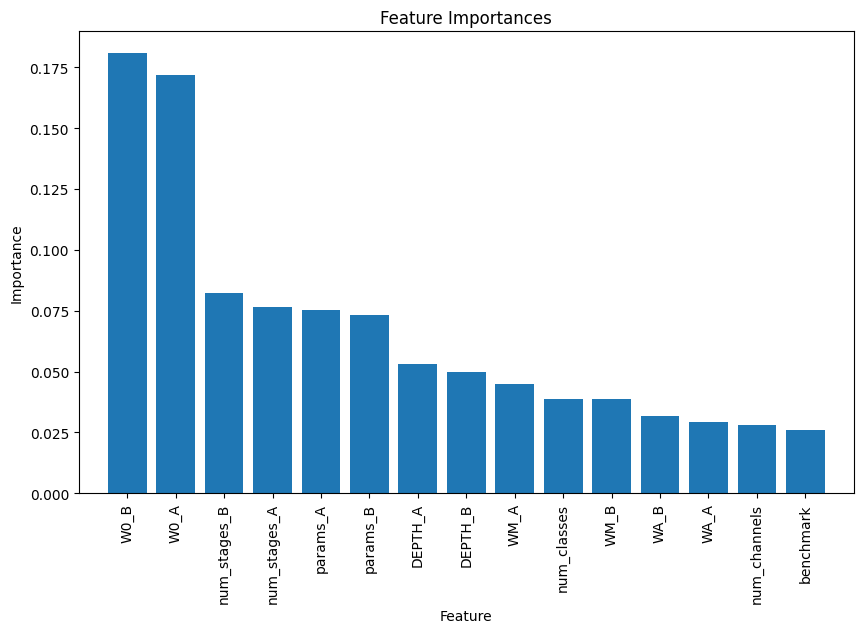

In [132]:
import matplotlib.pyplot as plt
importances = best_estimators["Random Forest"].feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.savefig("plots_predictor/feature_importances.png")
plt.show()

## Plot results

In [3]:
import json

with open('plots_predictor/epochs_results.json', 'r') as file:
    epochs_results = json.load(file)
with open('plots_predictor/accuracies.json', 'r') as file:
    accuracies = json.load(file)
with open('plots_predictor/test_accuracies.json', 'r') as file:
    test_accuracies = json.load(file)
with open('plots_predictor/corr_scores.json', 'r') as file:
    corr_scores = json.load(file)

In [453]:
test_accuracies["test_Gutenberg"][2]

{'Gradient Boosting': (0.5052631578947369, 0.5789473684210527),
 'Random Forest': (0.5842105263157895, 0.5789473684210527),
 'XGBoost': (0.5894736842105263, 0.5789473684210527)}

In [456]:
epochs_results[dataset][generation]

{'accuracy': {1: 0.6476190476190476,
  2: 0.3904761904761905,
  3: 0.6857142857142857,
  4: 0.6,
  5: 0.6,
  6: 0.5428571428571428,
  7: 0.3904761904761905,
  8: 0.5714285714285714,
  9: 0.5904761904761905,
  10: 0.47619047619047616},
 'correlation': {1: (0.3571428571428571, 0.29523809523809524),
  2: (-0.3571428571428571, -0.21904761904761905),
  3: (0.5, 0.37142857142857144),
  4: (0.23571428571428568, 0.20000000000000004),
  5: (0.2821428571428571, 0.20000000000000004),
  6: (0.05357142857142857, 0.08571428571428572),
  7: (-0.33571428571428563, -0.21904761904761905),
  8: (0.1714285714285714, 0.14285714285714288),
  9: (0.2964285714285714, 0.18095238095238098),
  10: (-0.11428571428571425, -0.04761904761904762)}}

In [457]:
test_accuracies.keys()

dict_keys(['test_Sadie', 'test_LaMelo', 'test_Chester', 'test_Gutenberg', 'test_Mateo', 'test_Adaline'])

In [472]:
accuracies_dfs=[]
generation=3
for dataset in test_accuracies.keys():
    print(dataset)
    baseline=pd.DataFrame(test_accuracies[dataset][generation-1]).iloc[1,0]
    acc_5= epochs_results[dataset][generation-1]["accuracy"][5]
    accuracies_df=pd.DataFrame(test_accuracies[dataset][generation-1]).head(1)
    accuracies_df["epoch5"]=acc_5
    accuracies_df["baseline"]=baseline
    accuracies_df=accuracies_df.T
    accuracies_df["dataset"]=dataset
    accuracies_df=accuracies_df.rename(columns={0:"acc"})
    accuracies_dfs.append(accuracies_df)
accuracies_dfs=pd.concat(accuracies_dfs).reset_index().rename(columns={"index":"predictor"})

test_Sadie
test_LaMelo
test_Chester
test_Gutenberg
test_Mateo
test_Adaline


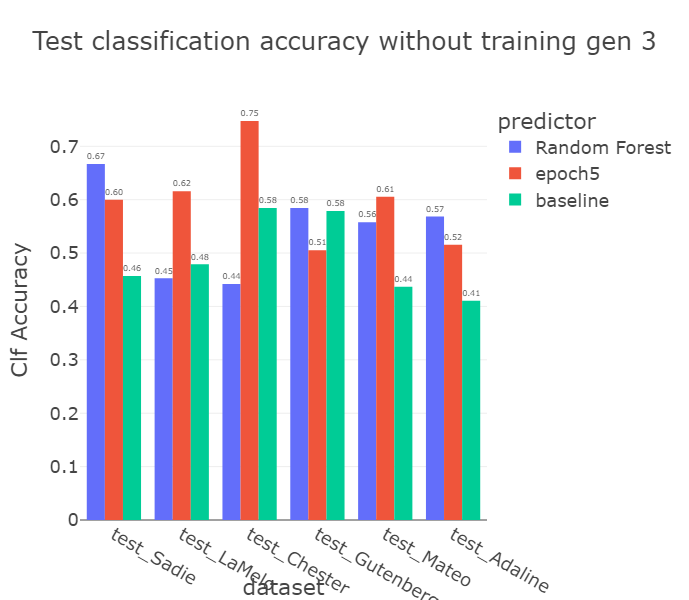

In [473]:
import plotly.express as px
accuracies_dfs=accuracies_dfs[~accuracies_dfs.predictor.isin(["Gradient Boosting","XGBoost"])]
fig = px.histogram(accuracies_dfs, x="dataset", y="acc",
             color='predictor', barmode='group',text_auto=".2f",
            title=f"Test classification accuracy without training gen {generation}"
             )
fig.update_yaxes(title_text='Clf Accuracy')
fig.update_layout(height=600, width=1000, template="presentation")
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=True)

In [73]:
#%pip install --proxy http://proxy:80 -U kaleido

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [475]:
pd.DataFrame(corr_scores[dataset][generation-1])

,Gradient Boosting,Random Forest,XGBoost
0,0.320301,0.148872,0.178947
1,0.252632,0.126316,0.178947
2,-0.233083,-0.233083,-0.233083
3,-0.178947,-0.178947,-0.178947


In [474]:
fig.write_image(f"plots_predictor/test_accuracy_histogram_gen_{generation}.png")

In [484]:
correlations_dfs=[]
generation=3
for dataset in corr_scores.keys():
    baseline_spearman=pd.DataFrame(corr_scores[dataset][generation-1]).iloc[2,0]
    baseline_tau=pd.DataFrame(corr_scores[dataset][generation-1]).iloc[3,0]
    corr_5, tau_5=epochs_results[dataset][generation-1]["correlation"][5]
    correlations_df=pd.DataFrame(corr_scores[dataset][generation-1]).head(2)
    correlations_df["corr_5"]=corr_5
    correlations_df["tau_5"]=tau_5
    correlations_df["baseline"]=baseline_spearman
    correlations_df["baseline_tau"]=baseline_tau

    correlations_df=correlations_df.T
    correlations_df["dataset"]=dataset
    correlations_df=correlations_df.rename(columns={0:"Spearman's Rank", 1:"Kendall's tau distance"})
    correlations_dfs.append(correlations_df)
correlations_dfs=pd.concat(correlations_dfs).reset_index().rename(columns={"index":"predictor"})

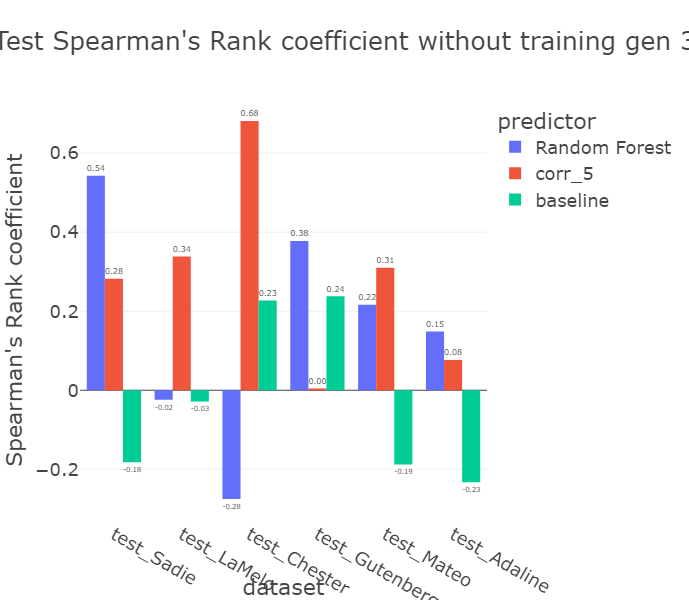

In [485]:
correlations_dfs=correlations_dfs[~correlations_dfs.predictor.isin(["Gradient Boosting","XGBoost"])]

fig = px.histogram(correlations_dfs[~correlations_dfs.predictor.isin(["tau_5","baseline_tau"])], x="dataset", y="Spearman's Rank",
             color='predictor', barmode='group',text_auto=".2f",
            title=f"Test Spearman's Rank coefficient without training gen {generation}"
             )
fig.update_yaxes(title_text="Spearman's Rank coefficient")
fig.update_layout(height=600, width=1000, template="presentation")
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=True)

In [486]:
fig.write_image(f"plots_predictor/test_correlations_histogram_gen_{generation}.png")

In [150]:
epochs_results["Sadie"][2]

{'accuracy': {'1': 0.6168067226890757,
  '2': 0.6521008403361345,
  '3': 0.653781512605042,
  '4': 0.6420168067226891,
  '5': 0.7176470588235294,
  '6': 0.6672268907563025,
  '7': 0.6857142857142857,
  '8': 0.6033613445378151,
  '9': 0.680672268907563,
  '10': 0.6285714285714286},
 'correlation': {'1': [0.2742296918767507, 0.23361344537815124],
  '2': [0.4372549019607843, 0.3042016806722689],
  '3': [0.43529411764705883, 0.30756302521008405],
  '4': [0.40896358543417366, 0.28403361344537814],
  '5': [0.6050420168067228, 0.43529411764705883],
  '6': [0.48879551820728295, 0.334453781512605],
  '7': [0.5086834733893558, 0.37142857142857144],
  '8': [0.2470588235294118, 0.20672268907563024],
  '9': [0.49859943977591037, 0.361344537815126],
  '10': [0.3554621848739496, 0.2571428571428571]}}

In [4]:
corr_epochs_dfs=[]
for dataset in epochs_results.keys():
    corr_epochs_df=pd.DataFrame(epochs_results[dataset][2]["correlation"]).T.rename(columns={0:"spearman's corr",1:"Kendall's distance"})
    corr_epochs_df["clf_correlation"]=corr_scores[dataset][2]["XGBoost"][0]
    corr_epochs_df["clf_kendall_dist"]=corr_scores[dataset][2]["XGBoost"][1]
    corr_epochs_df["dataset"]=dataset
    corr_epochs_dfs.append(corr_epochs_df)
corr_epochs_dfs=pd.concat(corr_epochs_dfs)

In [6]:
corr_epochs_dfs=corr_epochs_dfs.reset_index().rename(columns={"index":"epoch"})

In [7]:
corr_epochs_dfs

,epoch,spearman's corr,Kendall's distance,clf_correlation,clf_kendall_dist,dataset
0,1,0.743902,0.535897,0.158349,0.128205,Chester
1,2,0.774109,0.582051,0.158349,0.128205,Chester
2,3,0.809381,0.610256,0.158349,0.128205,Chester
3,4,0.789869,0.587179,0.158349,0.128205,Chester
4,5,0.784615,0.602564,0.158349,0.128205,Chester
...,...,...,...,...,...,...
65,6,0.662764,0.476529,0.564066,0.402560,Caitie
66,7,0.535398,0.379801,0.564066,0.402560,Caitie
67,8,0.669986,0.504979,0.564066,0.402560,Caitie
68,9,0.780501,0.598862,0.564066,0.402560,Caitie


In [13]:
corr_epochs_dfs = corr_epochs_dfs.melt(id_vars=['epoch',"dataset"], value_vars=["spearman's corr", "Kendall's distance", "clf_correlation", "clf_kendall_dist"], 
                     var_name='metric', value_name='score')

In [15]:
corr_epochs_dfs

,epoch,dataset,metric,score
0,1,Chester,spearman's corr,0.743902
1,2,Chester,spearman's corr,0.774109
2,3,Chester,spearman's corr,0.809381
3,4,Chester,spearman's corr,0.789869
4,5,Chester,spearman's corr,0.784615
...,...,...,...,...
275,6,Caitie,clf_kendall_dist,0.402560
276,7,Caitie,clf_kendall_dist,0.402560
277,8,Caitie,clf_kendall_dist,0.402560
278,9,Caitie,clf_kendall_dist,0.402560


In [29]:
import plotly.express as px
figs=[]
for dataset in corr_epochs_dfs.dataset.unique():
    fig = px.line(corr_epochs_dfs[(corr_epochs_dfs.dataset==dataset) & (corr_epochs_dfs.metric.isin(["spearman's corr","clf_correlation"]))], x='epoch', y="score", color='metric',
                  title=f'Spearman correlation {dataset}')

    # Adjust subplot titles
    fig.update_yaxes(title_text='', showticklabels=True)
    fig.update_xaxes(title_text='', showticklabels=True)
    fig.update_layout(template="presentation", height=600, width=900)
    fig.write_image(f"plots_predictor/{dataset}_correlation.png")
    figs.append(fig)

1
0
1
1
1
2
2
0
2
1
2
2
3
0


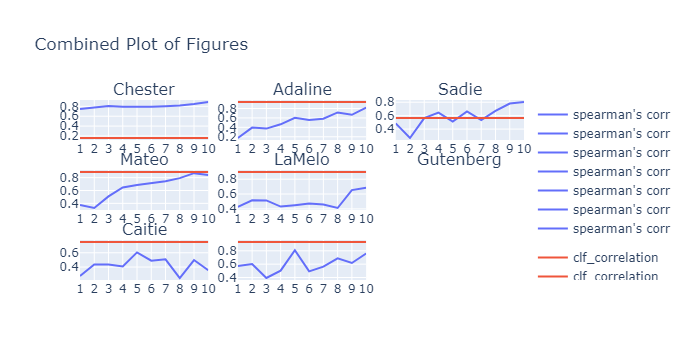

In [28]:
from plotly.subplots import make_subplots

# Create subplots with a 1x2 grid (one row, two columns)
fig_combined = make_subplots(rows=3, cols=3, subplot_titles=corr_epochs_dfs.dataset.unique())

# Add each figure to the subplots
total_figs=len(figs)
for i, fig in enumerate(figs, start=0):
    #print(i)
    print(int(i/3)+1)
    print(i%3)
    fig_combined.add_trace(fig.data[0], row=i%3+1, col=int(i/3)+1)
    fig_combined.add_trace(fig.data[1], row=i%3+1, col=int(i/3)+1)

# Update layout and display the combined plot
fig_combined.update_layout(title_text="Combined Plot of Figures")
fig_combined.show()

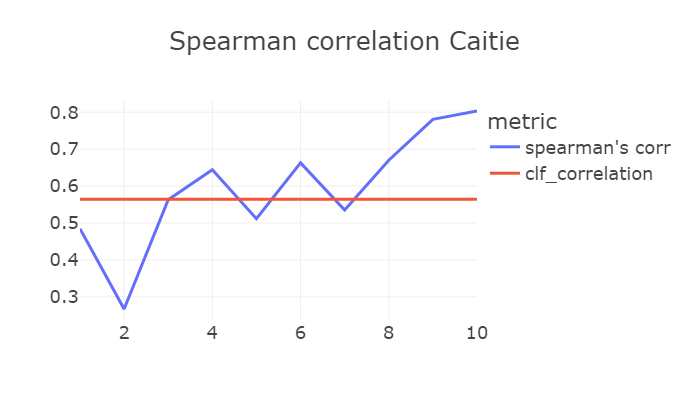

In [19]:
fig